In [5]:
from utils.load_results import *
from utils.plot_helpers import *

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
plt.style.use('default')

In [6]:
datasets = ['(3,4)', '(3,8)', '(3,16)', '(4,4)', '(4,8)', '(5,4)']
n_values = [4, 8, 16, 4, 8, 4]
n_attributes = [3, 3, 3, 4, 4, 5]
n_epochs = 300
n_datasets = len(datasets)
paths = ['results/' + d + '_game_size_10_vsf_3' for d in datasets]

## training

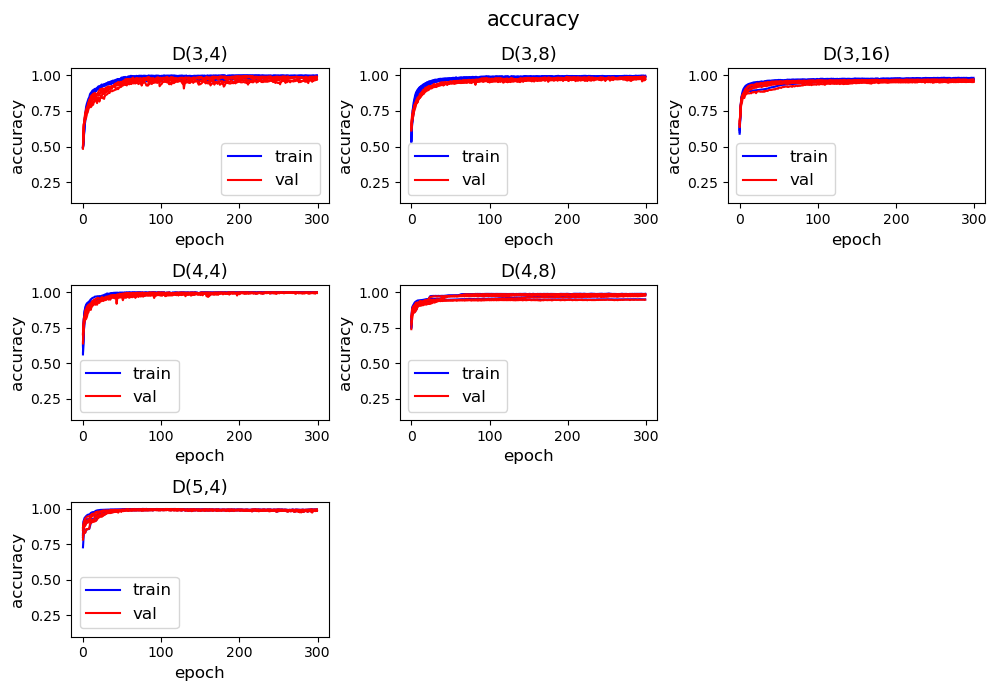

In [7]:
all_accuracies = load_accuracies(paths, n_runs=5, n_epochs=300, val_steps=1, zero_shot=True, context_unaware=False, length_cost=False)
plot_training_trajectory(all_accuracies['zs_specific_train_acc'], all_accuracies['zs_specific_val_acc'], ylim=(0.1, 1.05), steps=(1, 1))

## final accuracies 
### training and validation accuracies

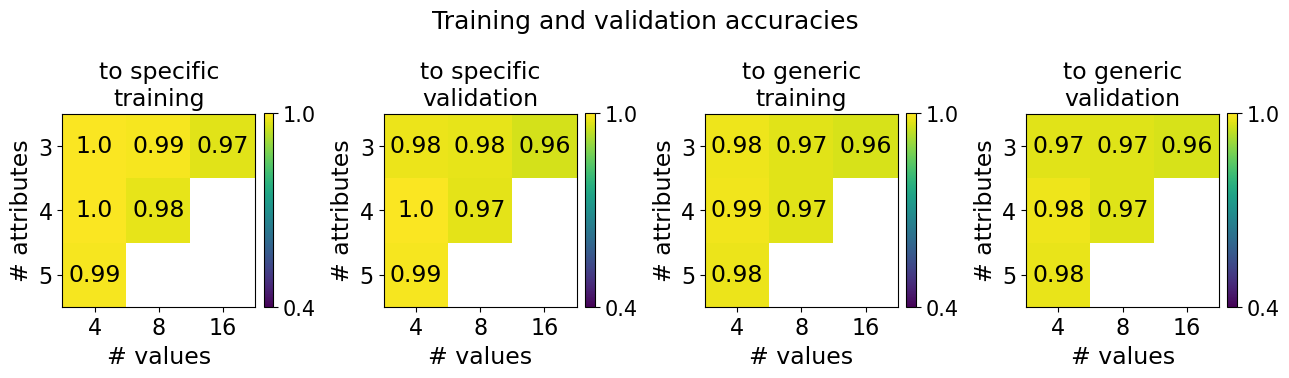

In [8]:
accuracies = [all_accuracies['zs_specific_train_acc'], all_accuracies['zs_specific_val_acc'],
              all_accuracies['zs_generic_train_acc'], all_accuracies['zs_generic_val_acc']]
plot_heatmap(accuracies, 'mean', plot_dims=(1,4), ylims=(0.4, 1.0), figsize=(13, 3.5), suptitle='Training and validation accuracies', 
             titles=('to specific\ntraining', 'to specific\nvalidation', 'to generic\ntraining', 'to generic\nvalidation'),
             fontsize=17)

In [9]:
# Convert the list to a NumPy array
acc_array = np.array(accuracies)

# Compute means and standard deviations over the five runs using the final accuracy at epoch 300
final_accs = acc_array[:,:,:,-1]
means = np.mean(final_accs, axis=2)
std_devs = np.std(final_accs, axis=2)

# Row names and column names
row_names = ["D(3,4)", "D(3,8)", "D(3,16)", "D(4,4)", "D(4,8)", "D(5,4)"]
col_names = ["to specific training", "to specific validation", "to generic training", "to generic validation"]

# Prepare the data for the DataFrames
data1 = []
data2 = []

# iterate over datasets
for i in range(means.shape[1]):
    row1 = []
    row2 = []
    # iterate over conditions
    for j in range(means.shape[0]):
        formatted_value = f"{means[j, i]:.2f} $\\pm$ {std_devs[j, i]:.2f}"
        if j < 2:
            row1.append(formatted_value)
        else:
            row2.append(formatted_value)
    data1.append(row1)
    data2.append(row2)

# Create DataFrames
df_1 = pd.DataFrame(data1, index=row_names, columns=col_names[:2])
df_2 = pd.DataFrame(data2, index=row_names, columns=col_names[2:])

# Convert DataFrames to LaTeX tables
latex_table_1 = df_1.to_latex(index=True, escape=False)
latex_table_2 = df_2.to_latex(index=True, escape=False)

print("To specific:")
print(latex_table_1)
print("\nTo generic:")
print(latex_table_2)


To specific:
\begin{tabular}{lll}
\toprule
 & to specific training & to specific validation \\
\midrule
D(3,4) & 1.00 $\pm$ 0.00 & 0.98 $\pm$ 0.01 \\
D(3,8) & 0.99 $\pm$ 0.00 & 0.98 $\pm$ 0.01 \\
D(3,16) & 0.97 $\pm$ 0.00 & 0.96 $\pm$ 0.01 \\
D(4,4) & 1.00 $\pm$ 0.00 & 1.00 $\pm$ 0.00 \\
D(4,8) & 0.98 $\pm$ 0.01 & 0.97 $\pm$ 0.01 \\
D(5,4) & 0.99 $\pm$ 0.00 & 0.99 $\pm$ 0.00 \\
\bottomrule
\end{tabular}


To generic:
\begin{tabular}{lll}
\toprule
 & to generic training & to generic validation \\
\midrule
D(3,4) & 0.98 $\pm$ 0.01 & 0.97 $\pm$ 0.02 \\
D(3,8) & 0.97 $\pm$ 0.00 & 0.97 $\pm$ 0.00 \\
D(3,16) & 0.96 $\pm$ 0.01 & 0.96 $\pm$ 0.01 \\
D(4,4) & 0.99 $\pm$ 0.01 & 0.98 $\pm$ 0.01 \\
D(4,8) & 0.97 $\pm$ 0.01 & 0.97 $\pm$ 0.02 \\
D(5,4) & 0.98 $\pm$ 0.01 & 0.98 $\pm$ 0.01 \\
\bottomrule
\end{tabular}


### zero-shot test accuracies

In [58]:
all_accuracies = load_accuracies(paths, n_runs=5, n_epochs=300, val_steps=1, zero_shot=True, context_unaware=False, length_cost=False, zero_shot_test_ds='test_sampled_unscaled')

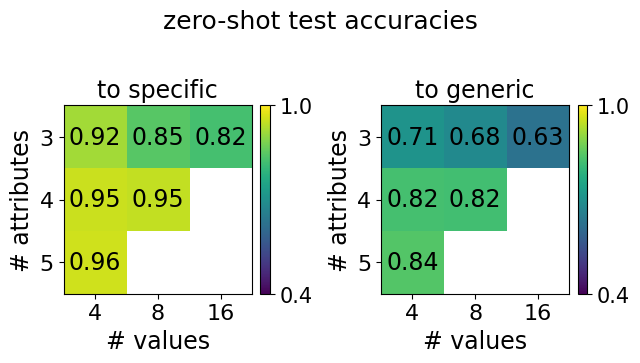

In [59]:
accuracies = [all_accuracies['zs_specific_test_acc'], all_accuracies['zs_generic_test_acc']]
plot_heatmap(accuracies, 'mean', plot_dims=(1,2), ylims=(0.4, 1.0), figsize=(6.5, 3.5), suptitle='zero-shot test accuracies', 
             titles=('to specific', 'to generic'),
             fontsize=17)

In [60]:
# Convert the list to a NumPy array
acc_array = np.array(accuracies)

# Compute means and standard deviations over the five runs
means = np.mean(acc_array, axis=-1)
std_devs = np.std(acc_array, axis=-1)

# Row names and column names
row_names = ["D(3,4)", "D(3,8)", "D(3,16)", "D(4,4)", "D(4,8)", "D(5,4)"]
col_names = ["to specific", "to generic"]

# Prepare the data for the DataFrames
data = []

# iterate over datasets
for i in range(means.shape[1]):
    row = []
    # iterate over conditions
    for j in range(means.shape[0]):
        formatted_value = f"{means[j, i]:.2f} $\\pm$ {std_devs[j, i]:.2f}"
        row.append(formatted_value)
    data.append(row)

# Create DataFrames
df = pd.DataFrame(data, index=row_names, columns=col_names)

# Convert DataFrames to LaTeX tables
latex_table = df.to_latex(index=True, escape=False)

print(latex_table)


\begin{tabular}{lll}
\toprule
{} &      to specific &       to generic \\
\midrule
D(3,4)  &  0.92 $\pm$ 0.02 &  0.71 $\pm$ 0.04 \\
D(3,8)  &  0.85 $\pm$ 0.01 &  0.68 $\pm$ 0.07 \\
D(3,16) &  0.82 $\pm$ 0.03 &  0.63 $\pm$ 0.03 \\
D(4,4)  &  0.95 $\pm$ 0.00 &  0.82 $\pm$ 0.02 \\
D(4,8)  &  0.95 $\pm$ 0.01 &  0.82 $\pm$ 0.07 \\
D(5,4)  &  0.96 $\pm$ 0.01 &  0.84 $\pm$ 0.06 \\
\bottomrule
\end{tabular}


/var/folders/k6/03rlh8jd6nqbws0_xg9jh20w0000gq/T/ipykernel_11846/1475190353.py:28: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df.to_latex(index=True, escape=False)


## Entropy scores

### Entropy scores training

In [61]:
entropy_scores_specific, entropy_scores_generic = load_entropies_zero_shot(paths, context_unaware=False, zero_shot_test_ds='test_sampled_unscaled') # 
entropies_specific = [entropy_scores_specific['NMI'], entropy_scores_specific['effectiveness'], entropy_scores_specific['consistency']]
entropies_generic = [entropy_scores_generic['NMI'], entropy_scores_generic['effectiveness'], entropy_scores_generic['consistency']]

/Users/kkobrock/Projects/phdproject1/emergent-abstractions/utils/load_results.py:534: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result_dict_specific[key] = np.array(result_dict_specific[key])
/Users/kkobrock/Projects/phdproject1/emergent-abstractions/utils/load_results.py:536: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result_dict_generic[key] = np.array(result_dict_generic[key])


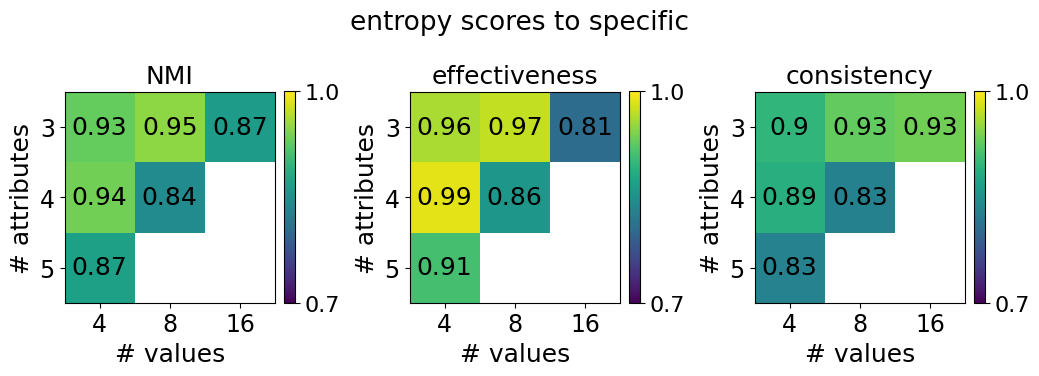

In [62]:
plot_heatmap(entropies_specific, 'mean', plot_dims=(1,3), ylims=(0.7, 1.0), figsize=(10.5, 3.5), 
             titles = ('NMI', 'effectiveness', 'consistency'), suptitle='entropy scores to specific')

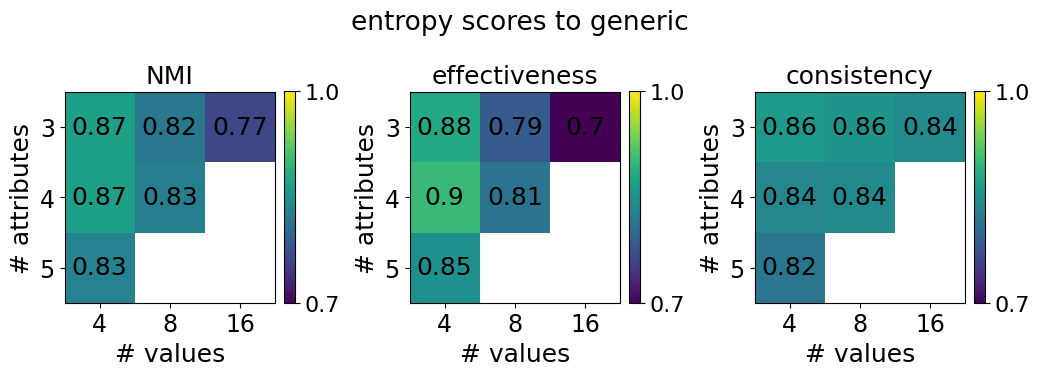

In [63]:
plot_heatmap(entropies_generic, 'mean', plot_dims=(1,3), ylims=(0.7, 1.0), figsize=(10.5, 3.5), 
             titles = ('NMI', 'effectiveness', 'consistency'), suptitle='entropy scores to generic')

In [64]:
entropies = [entropy_scores_specific['NMI'], entropy_scores_generic['NMI']]
# Convert the list to a NumPy array
NMI_array = np.array(entropies)

# Compute means and standard deviations over the five runs
means = np.mean(NMI_array, axis=-1)
std_devs = np.std(NMI_array, axis=-1)

# Row names and column names
row_names = ["D(3,4)", "D(3,8)", "D(3,16)", "D(4,4)", "D(4,8)", "D(5,4)"]
col_names = ["to specific", "to generic"]

# Prepare the data for the DataFrames
data = []

# iterate over datasets
for i in range(means.shape[1]):
    row = []
    # iterate over conditions
    for j in range(means.shape[0]):
        formatted_value = f"{means[j, i]:.2f} $\\pm$ {std_devs[j, i]:.2f}"
        row.append(formatted_value)
    data.append(row)

# Create DataFrames
df = pd.DataFrame(data, index=row_names, columns=col_names)

# Convert DataFrames to LaTeX tables
latex_table = df.to_latex(index=True, escape=False)

print(latex_table)


\begin{tabular}{lll}
\toprule
{} &      to specific &       to generic \\
\midrule
D(3,4)  &  0.93 $\pm$ 0.03 &  0.87 $\pm$ 0.04 \\
D(3,8)  &  0.95 $\pm$ 0.01 &  0.82 $\pm$ 0.02 \\
D(3,16) &  0.87 $\pm$ 0.01 &  0.77 $\pm$ 0.02 \\
D(4,4)  &  0.94 $\pm$ 0.01 &  0.87 $\pm$ 0.05 \\
D(4,8)  &  0.84 $\pm$ 0.03 &  0.83 $\pm$ 0.03 \\
D(5,4)  &  0.87 $\pm$ 0.02 &  0.83 $\pm$ 0.04 \\
\bottomrule
\end{tabular}


/var/folders/k6/03rlh8jd6nqbws0_xg9jh20w0000gq/T/ipykernel_11846/2051391022.py:29: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df.to_latex(index=True, escape=False)


### Entropy scores test

In [66]:
entropy_scores_specific, entropy_scores_generic = load_entropies_zero_shot(paths, context_unaware=False, test_interactions=True, zero_shot_test_ds='test_sampled_unscaled') # 
entropies_specific = [entropy_scores_specific['NMI'], entropy_scores_specific['effectiveness'], entropy_scores_specific['consistency']]
entropies_generic = [entropy_scores_generic['NMI'], entropy_scores_generic['effectiveness'], entropy_scores_generic['consistency']]

/Users/kkobrock/Projects/phdproject1/emergent-abstractions/utils/load_results.py:534: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result_dict_specific[key] = np.array(result_dict_specific[key])
/Users/kkobrock/Projects/phdproject1/emergent-abstractions/utils/load_results.py:536: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result_dict_generic[key] = np.array(result_dict_generic[key])


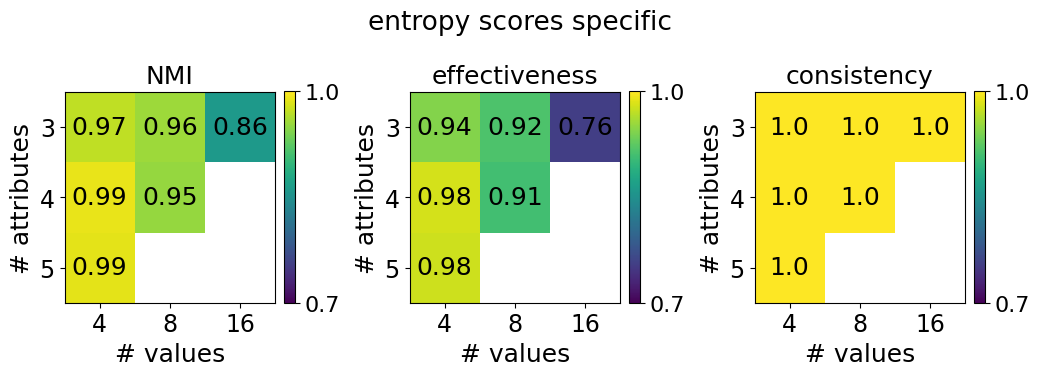

In [67]:
plot_heatmap(entropies_specific, 'mean', plot_dims=(1,3), ylims=(0.7, 1.0), figsize=(10.5, 3.5), 
             titles = ('NMI', 'effectiveness', 'consistency'), suptitle='entropy scores specific')

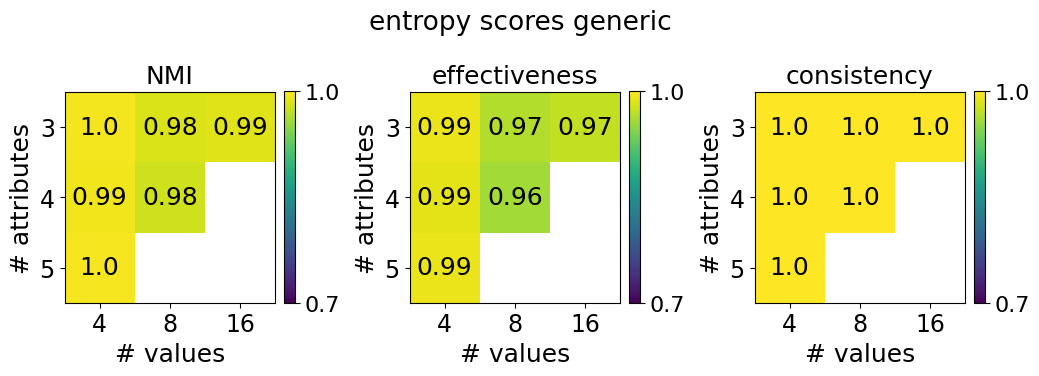

In [68]:
plot_heatmap(entropies_generic, 'mean', plot_dims=(1,3), ylims=(0.7, 1.0), figsize=(10.5, 3.5), 
             titles = ('NMI', 'effectiveness', 'consistency'), suptitle='entropy scores generic')

## Compositionality

In [31]:
setting = 'standard/zero_shot'
cond = 'generic'
zero_shot_test_ds = 'test_sampled_unscaled'

In [32]:
topsim_train, topsim_test = np.zeros((n_datasets, 5)), np.zeros((n_datasets, 5))

for d, dataset in enumerate(datasets): 
    for run in range(5):
        
        topsim_train_val_score = pickle.load(open(paths[d] + '/' + setting + '/' + str(cond) + '/' + str(run) + '/topsim_final.pkl', 'rb'))
        topsim_test_score = pickle.load(open(paths[d] + '/' + setting + '/' + str(cond) + '/' + str(run) + '/topsim_final_' + zero_shot_test_ds + '.pkl', 'rb'))
        topsim_train[d, run] = topsim_train_val_score['topsim_train']
        topsim_test[d, run] = topsim_test_score['topsim_test']

### Topsim

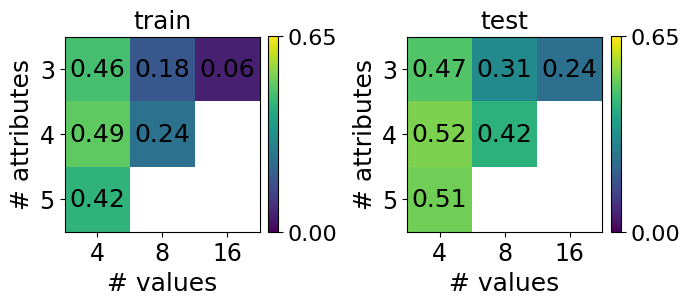

In [30]:
plot_heatmap([topsim_train, topsim_test], 'mean', plot_dims=(1,2), ylims=[0.0,0.65], figsize=(7,3.5), 
             titles=['train', 'test'], suptitle='', suptitle_position=1.)

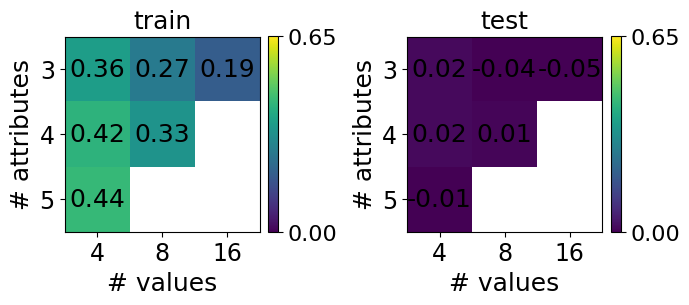

In [33]:
plot_heatmap([topsim_train, topsim_test], 'mean', plot_dims=(1,2), ylims=[0.0,0.65], figsize=(7,3.5), 
             titles=['train', 'test'], suptitle='', suptitle_position=1.)

## Symbol redundancy

### Train/val set

In [48]:
setting = 'standard/zero_shot'
cond = 'specific'

In [49]:
symbol_redundancy_dict = {'level': [], 'data set': [], 'run': [], 'symbol frequency': []}

for d, dataset in enumerate(datasets): 
    for run in range(5):
        
            scores = pickle.load(open(paths[d]  + '/' + setting + '/' + str(cond) + '/' + str(run) + '/symbol_redundancy.pkl', 'rb'))
                
            for level in range(5):
                
                symbol_redundancy_dict['level'].append(level)
                symbol_redundancy_dict['run'].append(run)
                symbol_redundancy_dict['data set'].append(dataset)
                try: 
                    symbol_redundancy_dict['symbol frequency'].append(scores['symbol_redundancy'][level])
                except: 
                    symbol_redundancy_dict['symbol frequency'].append(np.NaN)

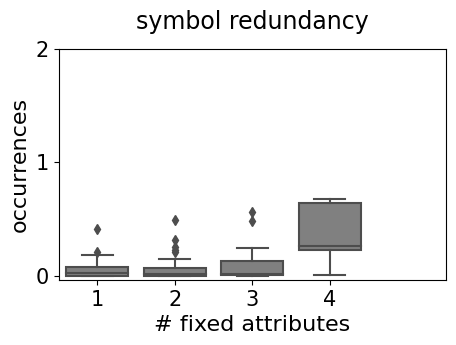

In [50]:
plt.figure(figsize=(5,3))
sns.boxplot(x='level', y='symbol frequency', data=symbol_redundancy_dict, color='gray')
plt.xticks(ticks=[0,1,2,3], labels=[1,2,3,4], fontsize=15)
plt.yticks(ticks=[0, 1, 2], fontsize=15)
plt.xlabel('# fixed attributes', fontsize=16)
plt.ylabel('occurrences', fontsize=16)
plt.title('symbol redundancy', fontsize=17, y=1.05)
plt.show()

In [56]:
cond = 'generic'

In [57]:
symbol_redundancy_dict = {'level': [], 'data set': [], 'run': [], 'symbol frequency': []}

for d, dataset in enumerate(datasets): 
    for run in range(5):
        
            scores = pickle.load(open(paths[d]  + '/' + setting + '/' + str(cond) + '/' + str(run) + '/symbol_redundancy.pkl', 'rb'))
                
            for level in range(5):
                
                symbol_redundancy_dict['level'].append(level)
                symbol_redundancy_dict['run'].append(run)
                symbol_redundancy_dict['data set'].append(dataset)
                try: 
                    symbol_redundancy_dict['symbol frequency'].append(scores['symbol_redundancy'][level])
                except: 
                    symbol_redundancy_dict['symbol frequency'].append(np.NaN)

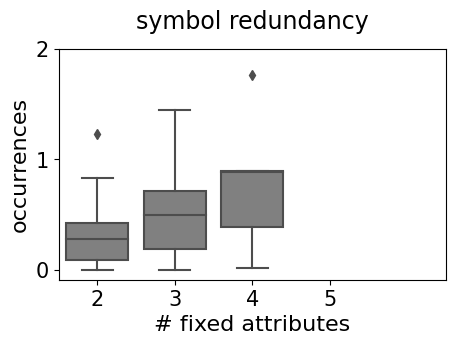

In [60]:
plt.figure(figsize=(5,3))
sns.boxplot(x='level', y='symbol frequency', data=symbol_redundancy_dict, color='gray')
plt.xticks(ticks=[0,1,2,3], labels=[2,3,4,5], fontsize=15)
plt.yticks(ticks=[0, 1, 2], fontsize=15)
plt.xlabel('# fixed attributes', fontsize=16)
plt.ylabel('occurrences', fontsize=16)
plt.title('symbol redundancy', fontsize=17, y=1.05)
plt.show()

### Test set

In [61]:
setting = 'standard/zero_shot'
cond = 'specific'

In [62]:
symbol_redundancy_dict = {'level': [], 'data set': [], 'run': [], 'symbol frequency': []}

for d, dataset in enumerate(datasets): 
    for run in range(5):
        
            scores = pickle.load(open(paths[d]  + '/' + setting + '/' + str(cond) + '/' + str(run) + '/symbol_redundancy_test.pkl', 'rb'))
                
            for level in range(5):
                
                symbol_redundancy_dict['level'].append(level)
                symbol_redundancy_dict['run'].append(run)
                symbol_redundancy_dict['data set'].append(dataset)
                try: 
                    symbol_redundancy_dict['symbol frequency'].append(scores['symbol_redundancy'][level])
                except: 
                    symbol_redundancy_dict['symbol frequency'].append(np.NaN)

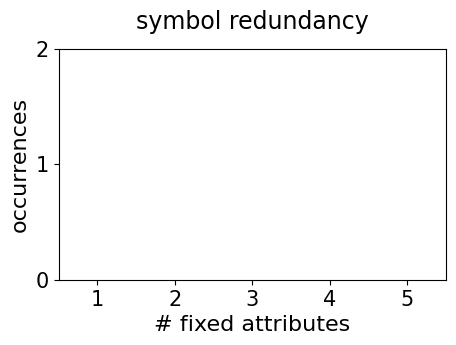

In [63]:
plt.figure(figsize=(5,3))
sns.boxplot(x='level', y='symbol frequency', data=symbol_redundancy_dict, color='gray')
plt.xticks(ticks=[0,1,2,3,4], labels=[1,2,3,4,5], fontsize=15)
plt.yticks(ticks=[0, 1, 2], fontsize=15)
plt.xlabel('# fixed attributes', fontsize=16)
plt.ylabel('occurrences', fontsize=16)
plt.title('symbol redundancy', fontsize=17, y=1.05)
plt.show()

In [64]:
cond = 'generic'

In [65]:
symbol_redundancy_dict = {'level': [], 'data set': [], 'run': [], 'symbol frequency': []}

for d, dataset in enumerate(datasets): 
    for run in range(5):
        
            scores = pickle.load(open(paths[d]  + '/' + setting + '/' + str(cond) + '/' + str(run) + '/symbol_redundancy_test.pkl', 'rb'))
                
            for level in range(5):
                
                symbol_redundancy_dict['level'].append(level)
                symbol_redundancy_dict['run'].append(run)
                symbol_redundancy_dict['data set'].append(dataset)
                try: 
                    symbol_redundancy_dict['symbol frequency'].append(scores['symbol_redundancy'][level])
                except: 
                    symbol_redundancy_dict['symbol frequency'].append(np.NaN)

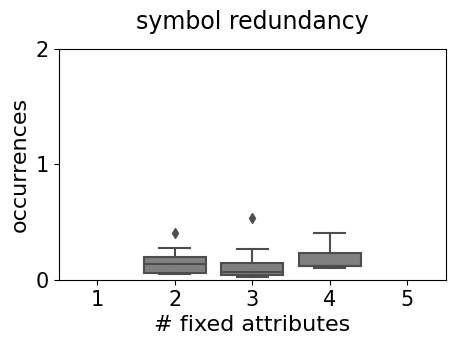

In [66]:
plt.figure(figsize=(5,3))
sns.boxplot(x='level', y='symbol frequency', data=symbol_redundancy_dict, color='gray')
plt.xticks(ticks=[0,1,2,3,4], labels=[1,2,3,4,5], fontsize=15)
plt.yticks(ticks=[0, 1, 2], fontsize=15)
plt.xlabel('# fixed attributes', fontsize=16)
plt.ylabel('occurrences', fontsize=16)
plt.title('symbol redundancy', fontsize=17, y=1.05)
plt.show()